# Metody eksploracji danych - Laboratorium 3a

## Przetwarzanie języka naturalnego

Klasyfikacja czy tween odnosi się do aplikacji Mandrill

In [1]:
# Import libraries
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Wczytanie danych

In [3]:
data_dir = Path('data')
data_file = data_dir / 'MED-lab-3-Zad 3-Mandrill-Dane.csv'

In [4]:
df = pd.read_csv(data_file, sep=';')

In [5]:
df.head()

,Post,is_mandrill
0,[blog] Using Nullmailer and Mandrill for your ...,1.0
1,[blog] Using Postfix and free Mandrill email s...,1.0
2,@aalbertson There are several reasons emails g...,1.0
3,@adrienneleigh I just switched it over to Mand...,1.0
4,@ankeshk +1 to @mailchimp We use MailChimp for...,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Post         300 non-null    object 
 1   is_mandrill  300 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.0+ KB


## Przygotowanie danych

### Czyszczenie danych

In [81]:
# Import libraries for text processing
import re
import string
# import nltk
from nltk.corpus import stopwords
from nltk import stem

In [9]:
def text_cleaning(x: str, stop_words=stopwords.words("english")):
    """Clean the text.
    Args:
        x (str): Text to clean.
        stop_words (list): List of stopwords to remove.
    Returns:
        x (str): Cleaned text."""
    x = x.lower()
    x = " ".join([word for word in x.split(" ") if word not in stop_words])
    x = x.encode("ascii", "ignore").decode()
    x = re.sub(r"https*\S+", " ", x)
    x = re.sub(r'\n', " ", x)
    x = re.sub(r"@\S+", " ", x)
    x = re.sub(r"#\S+", " ", x)
    x = re.sub(r"\'\w+", "", x)
    x = re.sub("[%s]" % re.escape(string.punctuation), " ", x)
    x = re.sub(r"\w*\d+\w*", "", x)
    x = re.sub(r"\s{2,}", " ", x)
    return x

In [16]:
def define_encodings(text: str) -> str:
    """Define encodings."""
    return text.encode("utf-8", "ignore").decode("ascii", "ignore")

In [83]:
def stemming(text: str) -> str:
    """Stemming."""
    stemmer = stem.PorterStemmer()
    text = " ".join([stemmer.stem(word) for word in text.split(" ")])
    return text

In [13]:
# Change Post column to string
df['Post'] = df['Post'].astype(str)

In [14]:
# Clean the text
df['Post'] = df['Post'].apply(lambda x: text_cleaning(x))

In [17]:
# Define encodings
df['Post'] = df['Post'].apply(lambda x: define_encodings(x))

In [84]:
# Stemming
df['Post'] = df['Post'].apply(lambda x: stemming(x))

In [30]:
# Drop nan values
df.dropna(inplace=True)

In [85]:
df.head(n=10)

,Post,is_mandrill,Post_Length
0,blog use nullmail mandril ubuntu linux server...,1.0,9
1,blog use postfix free mandril email servic sm...,1.0,11
2,sever reason email go spam mind submit reques...,1.0,10
3,switch mandril let see improv speed email sent,1.0,8
4,use mailchimp market email mandril app txn em...,1.0,8
5,error may occur unsupport auth method use ema...,1.0,12
6,mind send us detail account via thing look co...,1.0,12
7,vari send realli low volum may worth it offer...,1.0,12
8,check mandril transact email servic run,1.0,6
9,i use mandril save issu domain get block boun...,1.0,12


In [32]:
# Number of rows after cleaning
df.shape[0]

300

### Przegląd danych

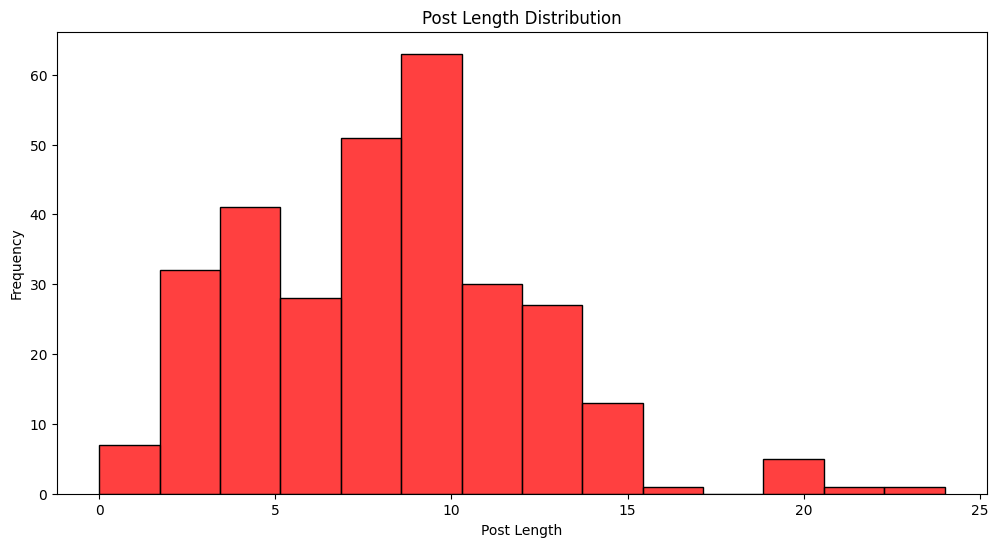

In [86]:
# Get the length of each post
df['Post_Length'] = df['Post'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.histplot(df['Post_Length'], color='red')
plt.title('Post Length Distribution')
plt.xlabel('Post Length')
plt.ylabel('Frequency')
plt.show()

In [87]:
# Look at the shortest post
df[df['Post_Length'] == 1]

,Post,is_mandrill,Post_Length
75,use,1.0,1
123,nice,1.0,1
178,i,0.0,1
210,mandril,0.0,1
297,solid,0.0,1


In [88]:
# Look at the longest post
df[df['Post_Length'] == max(df['Post_Length'])]

,Post,is_mandrill,Post_Length
56,el equivalent de sengrid es mailchip mandril ...,1.0,24


In [37]:
# Get most freaquent words
from collections import Counter

In [89]:
# Get all words
words = []
for post in df['Post']:
    for word in post.split():
        words.append(word)

In [90]:
# Get most frequent words
counter = Counter(words)

In [91]:
counter.most_common(10)

[('mandril', 204),
 ('email', 40),
 ('de', 37),
 ('spark', 25),
 ('use', 24),
 ('get', 20),
 ('send', 20),
 ('x', 20),
 ('mailchimp', 19),
 ('detail', 18)]

In [92]:
# Get posts with 'mandrill' word
def get_percentage_if_true_for_word(word, df):
    mandrill_df = df[df['Post'].str.contains(word)]
    percentage = mandrill_df[mandrill_df['is_mandrill'] == 1].shape[0] / mandrill_df.shape[0] * 100
    return percentage

In [93]:
for word in Counter(words).most_common(10):
    print(f'{word[0]}: {get_percentage_if_true_for_word(word[0], df):.2f}%')

mandril: 48.72%
email: 100.00%
de: 60.26%
spark: 0.00%
use: 96.30%
get: 37.50%
send: 94.29%
x: 28.95%
mailchimp: 100.00%
detail: 100.00%


In [94]:
# Get most valuable words
word_percentage = {}
for word in set(words):
    word_percentage[word] = get_percentage_if_true_for_word(word, df)

In [95]:
print('Most valuable words:')
for word in sorted(word_percentage, key=word_percentage.get, reverse=True)[:10]:
    print(f'{word}: {word_percentage[word]:.2f}% occurs: {counter[word]}')

Most valuable words:
digitalocean: 100.00% occurs: 1
photo: 100.00% occurs: 1
error: 100.00% occurs: 2
python: 100.00% occurs: 2
overal: 100.00% occurs: 1
question: 100.00% occurs: 2
reach: 100.00% occurs: 1
web: 100.00% occurs: 1
light: 100.00% occurs: 1
everyon: 100.00% occurs: 1


## Trening modelu

### Podział danych na zbiór treningowy i testowy

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X = df['Post']
y = df['is_mandrill']

### Process danych tekstowych

In [80]:
# Preprocess text data
from sklearn.feature_extraction.text import TfidfVectorizer

In [96]:
# Create vectorizer
vectorizer = TfidfVectorizer()

In [97]:
# Fit vectorizer
vectorizer.fit(X)

TfidfVectorizer()

In [98]:
# Transform X
X = vectorizer.transform(X)

In [99]:
X.shape

(300, 1229)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Naiwny klasyfikator Bayesa

In [103]:
# naive bayes
from sklearn.naive_bayes import MultinomialNB

### Testowanie modelu

In [104]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [105]:
predictions = nb_model.predict(X_test)

In [106]:
print(f'Predictions: {predictions}')
print(f'Actual: {np.array(y_test)}')

Predictions: [1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
Actual: [1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [107]:
accuracy = (predictions == np.array(y_test)).mean()
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


In [108]:
# confusion matrix
from sklearn.metrics import confusion_matrix

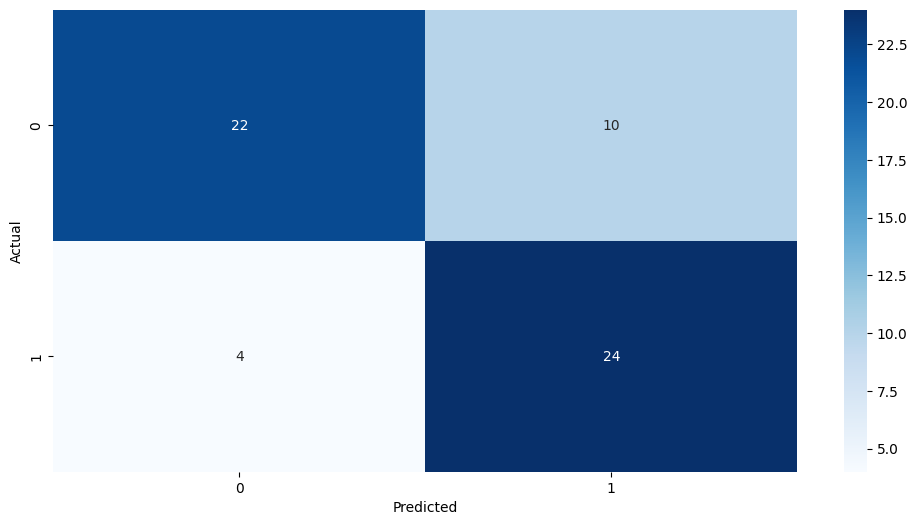

In [110]:
# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()